In [149]:
# import all required libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [150]:
# Loading data
df = pd.read_csv("Churn.csv")

In [151]:
# Check first 5 records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
df.shape

(7043, 21)

In [153]:
# check data type of every column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [154]:
# check min and max of numerical column
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [155]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
#from above observations we nee to conver total charge column into numeric type

In [157]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")# if there are any invalid values coerece will set to NAN
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [158]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

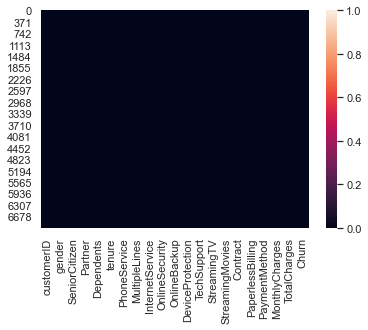

In [159]:
sb.heatmap(df.isnull())

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [161]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [162]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [163]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

We will fill NaN with the mean

In [164]:
# get mean of values in column Total Charge
df['TotalCharges'].mean()

2283.3004408418697

In [165]:
# Replace NaNs in column Toral charges
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [167]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

WE dont have any NaN values in our dataset

In [168]:
#Unique values in each categorical variable:
print(df["PaymentMethod"].nunique())
print(df["Contract"].unique())

4
['Month-to-month' 'One year' 'Two year']


In [169]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [170]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [171]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

VISULISATION

In [172]:
def categorical_column(col_name):
    f,ax = plt.subplots(1,2, figsize=(10,6))
     
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'{col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    
    sb.countplot(col_name, hue='Churn',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Churn by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

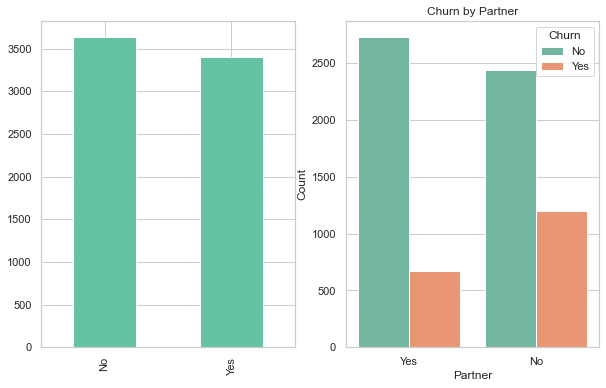

In [173]:
categorical_column('Partner')

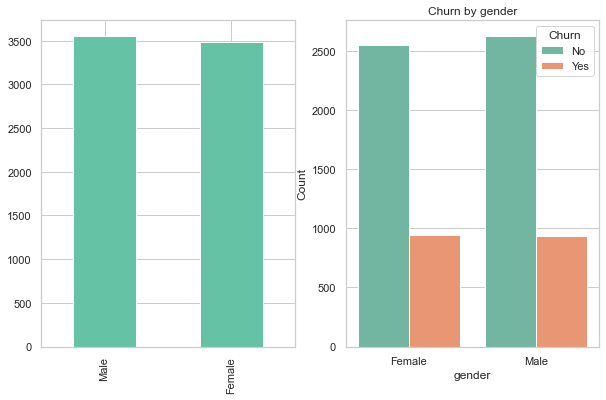

In [174]:
categorical_column('gender')

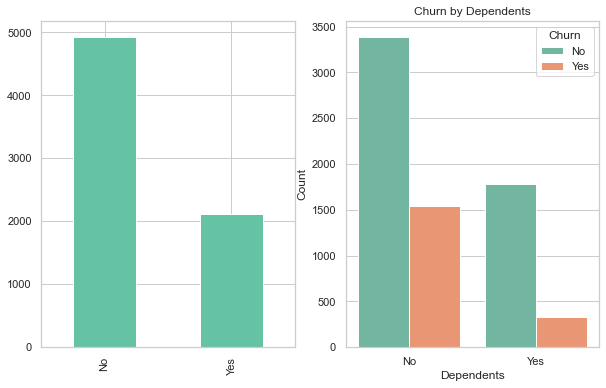

In [175]:
categorical_column('Dependents')

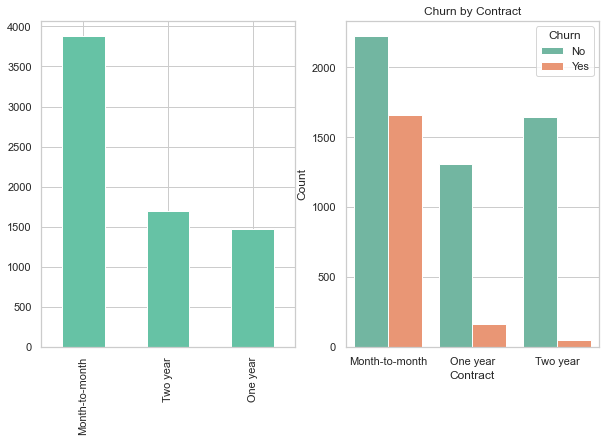

In [176]:
categorical_column('Contract')

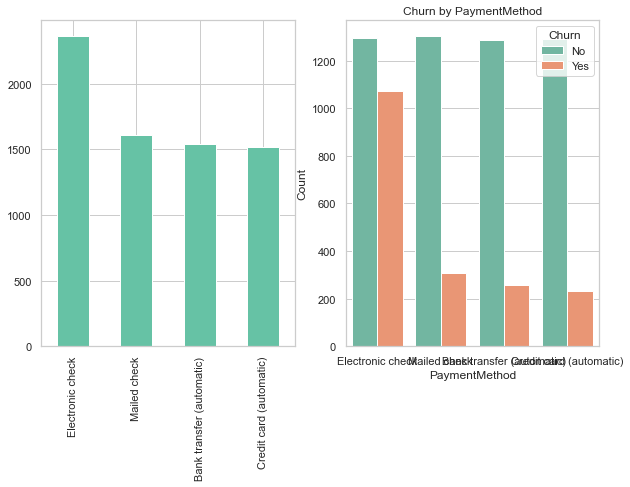

In [177]:
categorical_column('PaymentMethod')

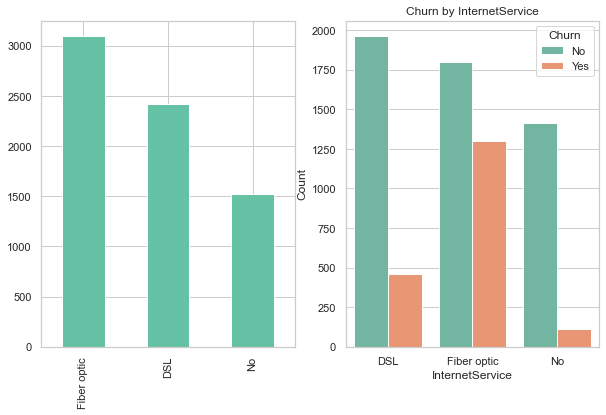

In [178]:
categorical_column('InternetService')

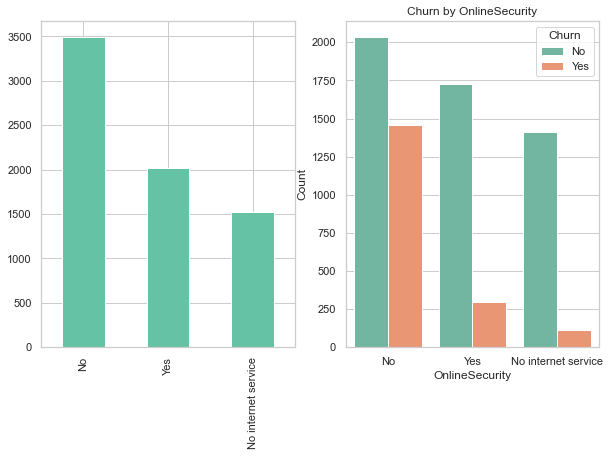

In [179]:
categorical_column('OnlineSecurity')

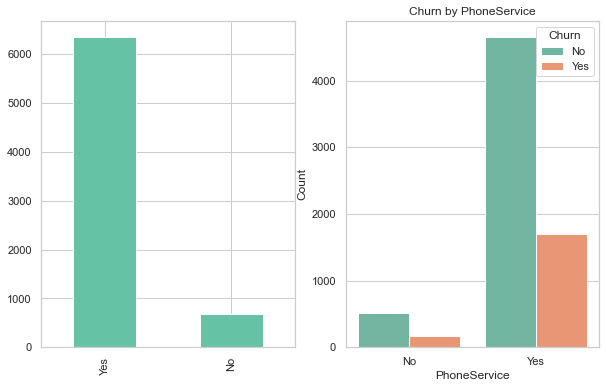

In [180]:
categorical_column('PhoneService')

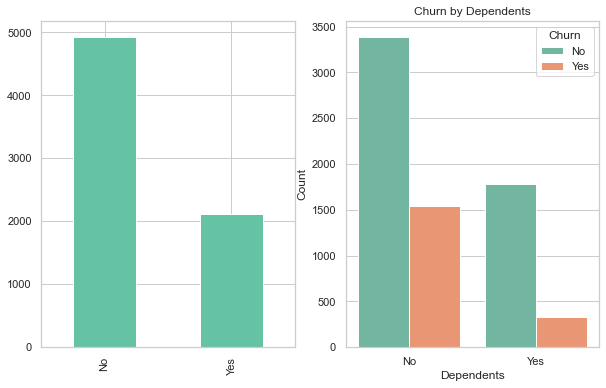

In [181]:
categorical_column('Dependents')

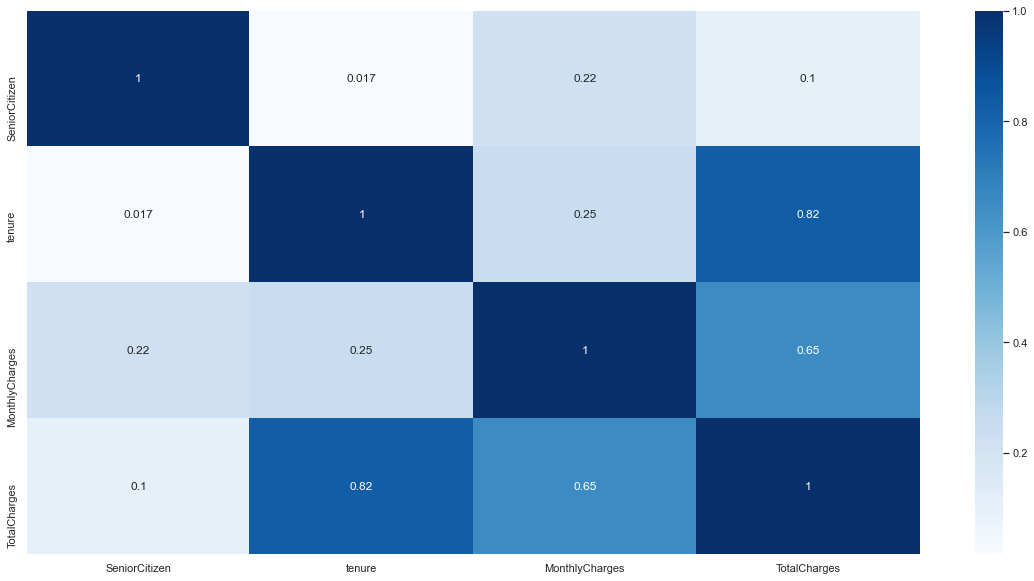

In [182]:
#Check correlation
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

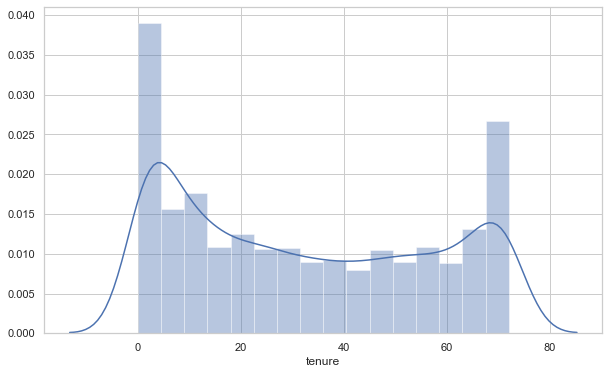

In [183]:
plt.figure(figsize=(10,6))
sb.distplot(df['tenure'])
plt.show()

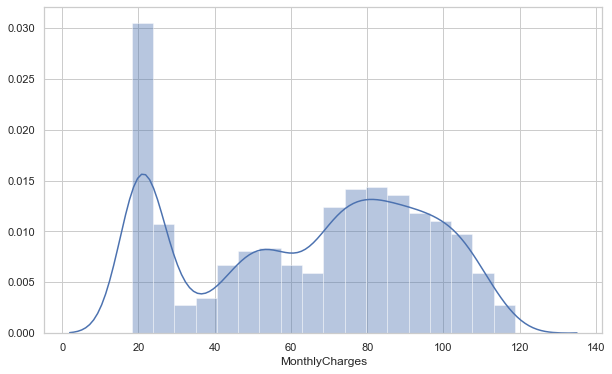

In [184]:
plt.figure(figsize=(10,6))
sb.distplot(df['MonthlyCharges'])
plt.show()

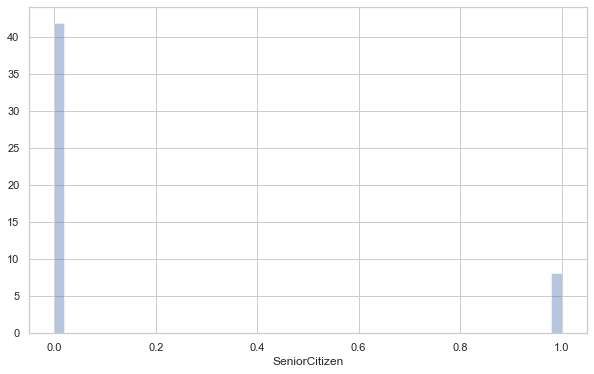

In [185]:
plt.figure(figsize=(10,6))
sb.distplot(df['SeniorCitizen'])
plt.show()

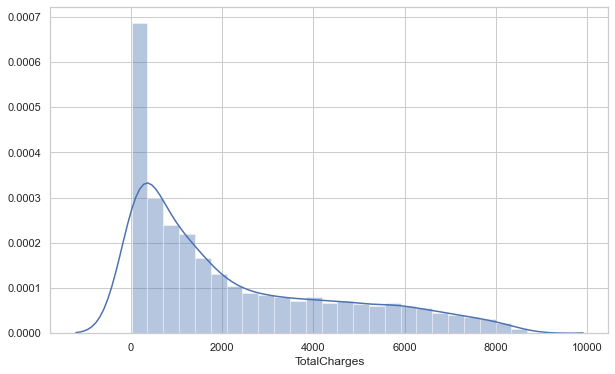

In [186]:
plt.figure(figsize=(10,6))
sb.distplot(df['TotalCharges'])
plt.show()

In [187]:
from sklearn.preprocessing import LabelEncoder

In [188]:
#Create a label encoder object
le = LabelEncoder()
# Here we will be used Label Encoding for columns with 2 or less unique 
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [189]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [190]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [191]:
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(df[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

In [192]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,1,0,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,1,0,0,1,0,0,1,0,0


In [193]:
# We will drop Customer ID column because its just ids so i think it wont effect or use to our model

df.drop('customerID',axis=1,inplace=True)

In [194]:
#check new dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [195]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


In [196]:
df.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
PaymentMethod#Bank transfer (automatic)      uint8
PaymentMethod#Credit card (automatic)        uint8
PaymentMethod#Electronic check               uint8
PaymentMethod#Mailed check                   uint8
MultipleLines#No                             uint8
MultipleLines#No phone service               uint8
MultipleLines#Yes                            uint8
InternetService#DSL                          uint8
InternetService#Fiber optic                  uint8
InternetService#No             

Text(0.5, 0, 'Customer Churn')

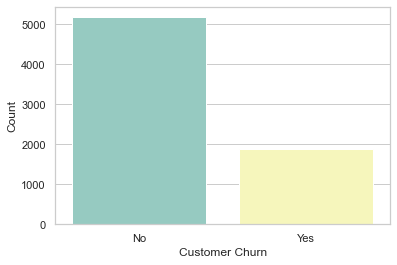

In [197]:
# Distribution of the target variable

sb.set(style="whitegrid")

ax=sb.countplot(x='Churn',palette="Set3", data=df)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")

 We will check correlation of Churn with other features

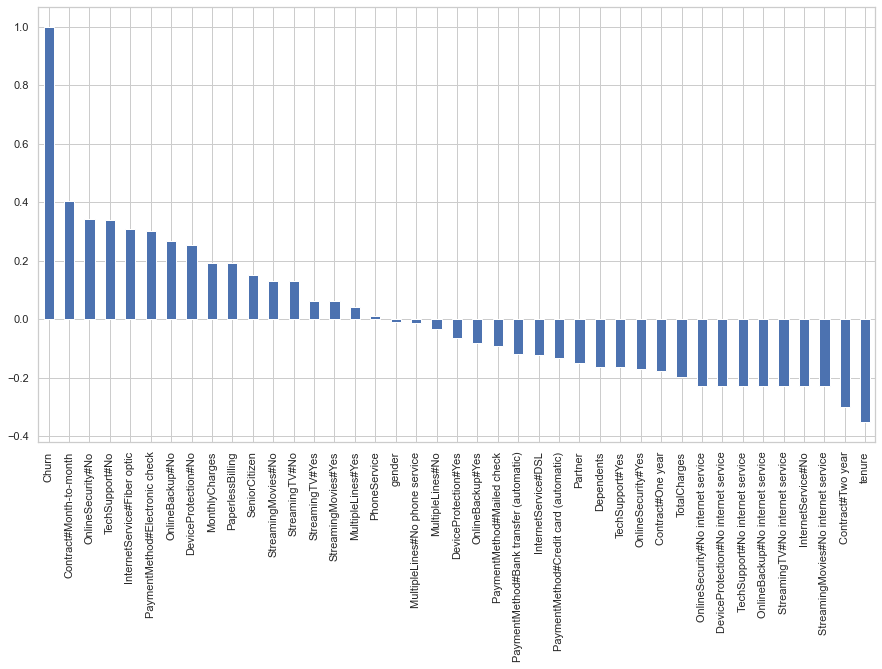

In [198]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

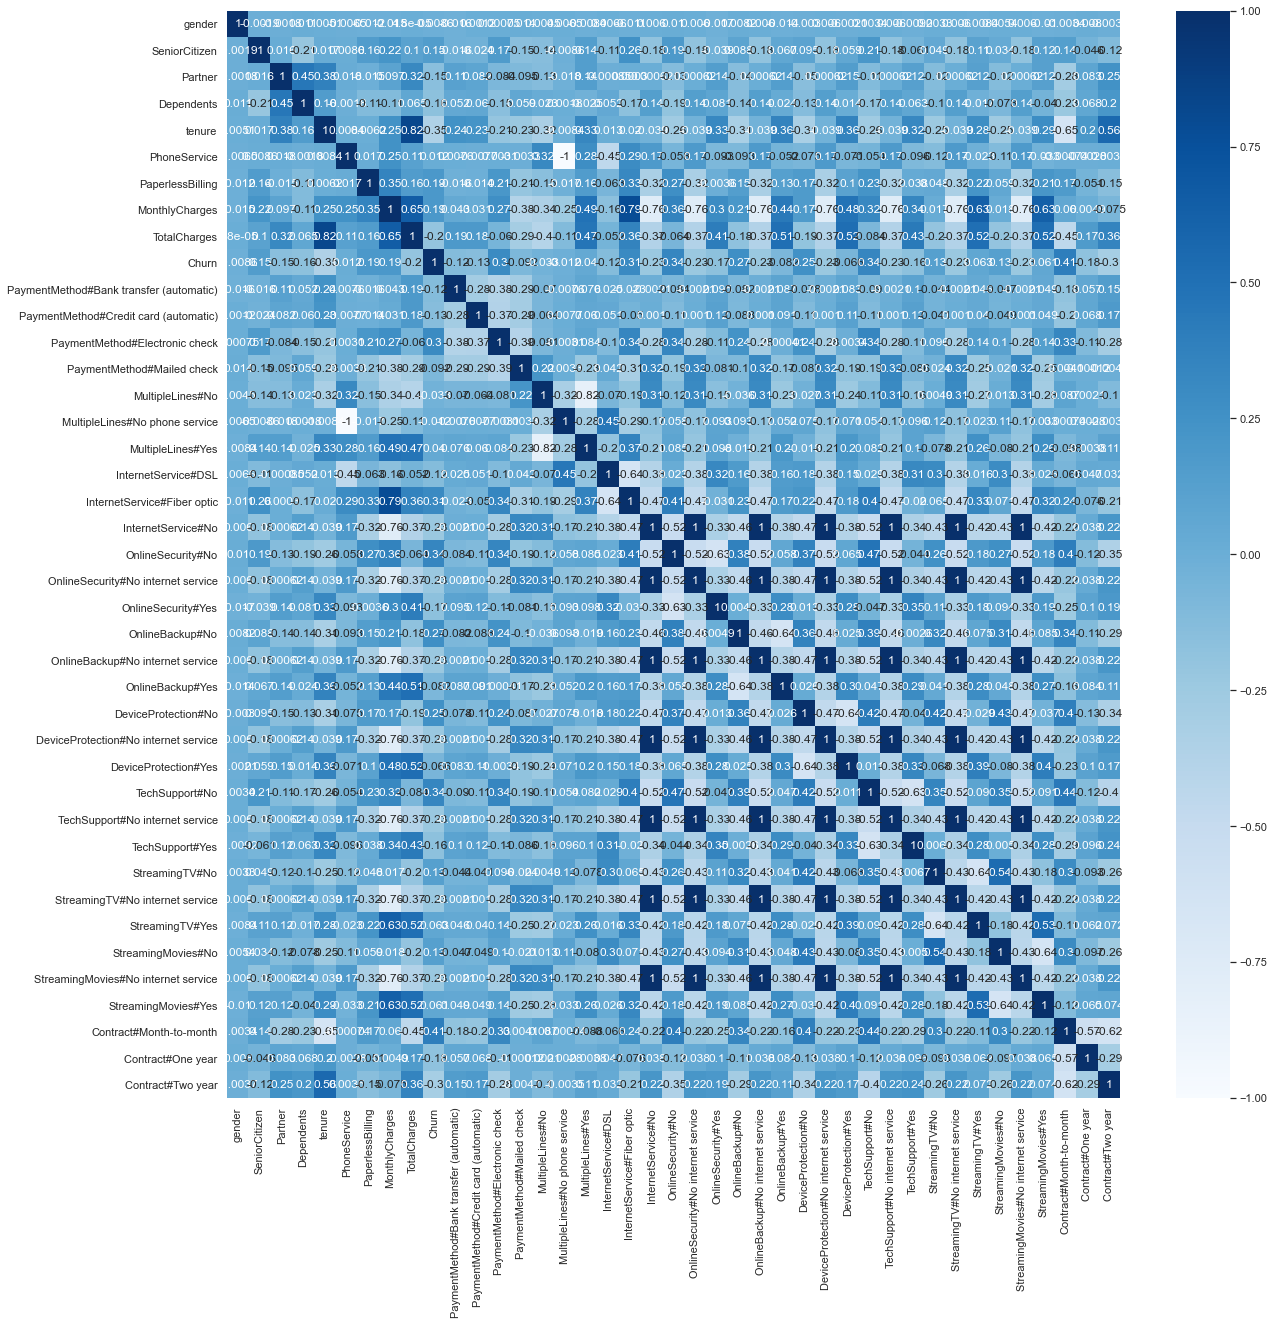

In [199]:
fig=plt.figure(figsize=(20,20))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

In [200]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,0.000048,-0.008612,...,-0.009212,0.003267,0.006026,-0.008393,0.005374,0.006026,-0.010487,-0.003386,0.008026,-0.003695
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889,...,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448,...,0.119999,-0.124357,0.000615,0.124666,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535,-0.164221,...,0.063268,-0.101176,0.139812,-0.016558,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229,...,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942,...,-0.096340,-0.122455,0.172209,-0.022574,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825,...,0.037880,0.047712,-0.321013,0.223841,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356,...,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681
TotalCharges,0.000048,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428,...,0.432480,-0.197030,-0.374263,0.515314,-0.202451,-0.374263,0.519574,-0.446348,0.170491,0.357224
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000,...,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253


In [201]:
sb.pairplot(df)

Now we will split the data into x and y, then again we will check skewness snd corr. if any and try to remove it.

In [202]:
x = df.loc[:, df.columns != 'Churn']
y = df.loc[:, df.columns == 'Churn']
print('Shape of X: {}'.format(x.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7043, 40)
Shape of y: (7043, 1)


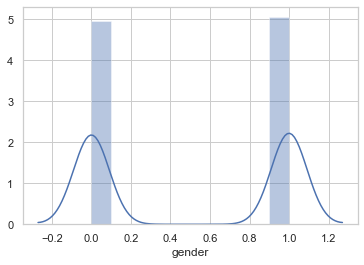

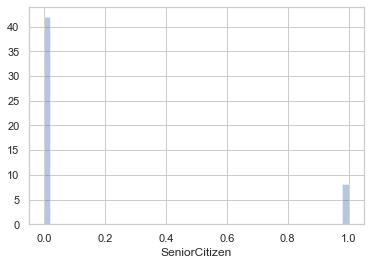

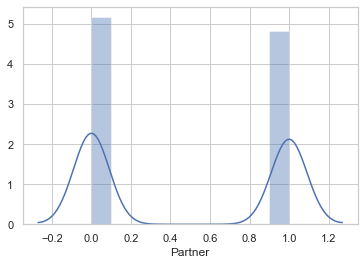

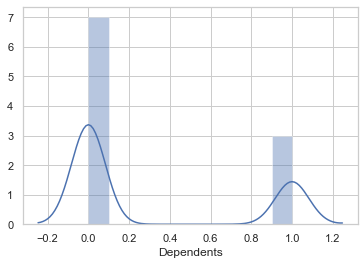

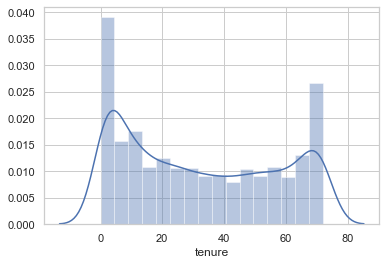

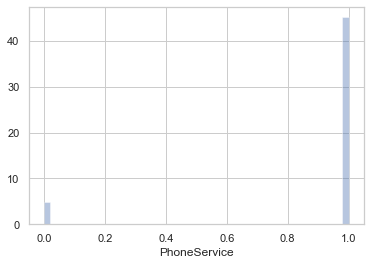

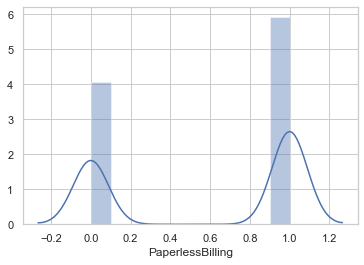

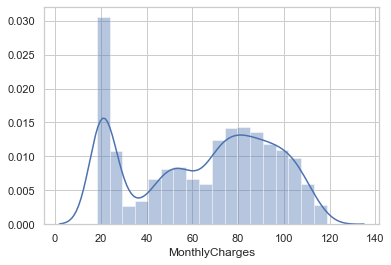

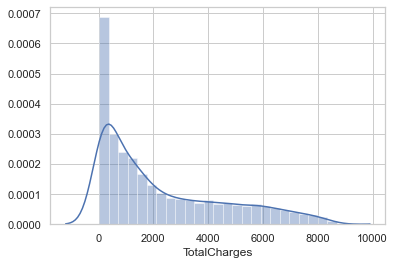

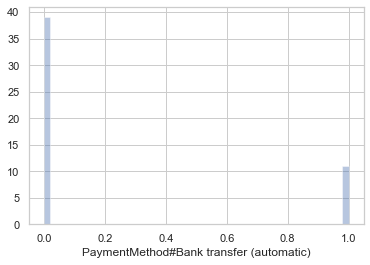

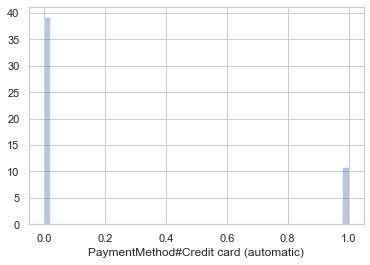

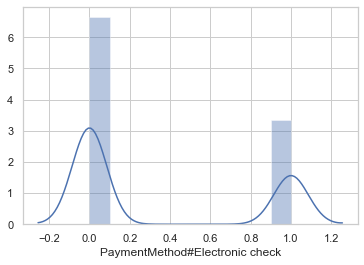

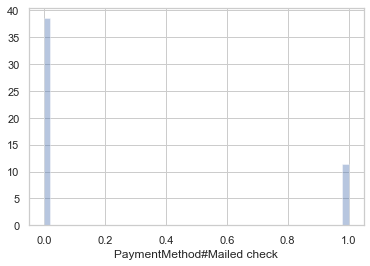

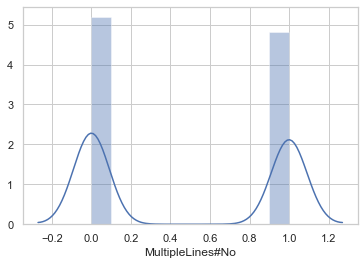

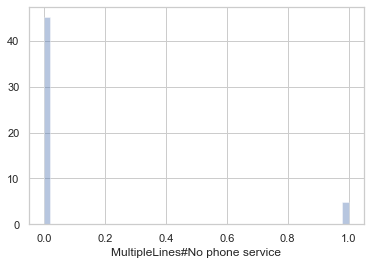

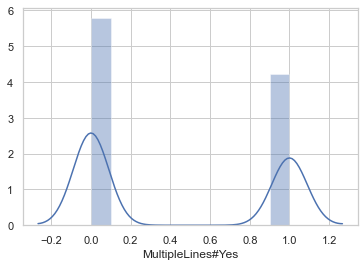

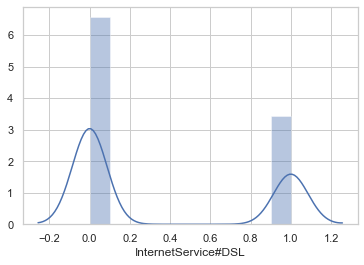

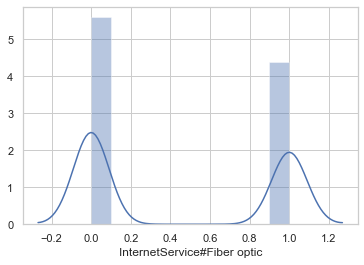

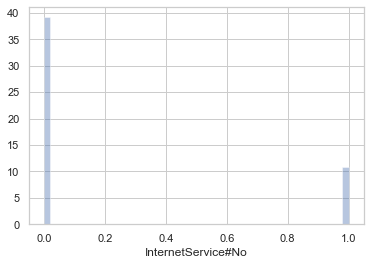

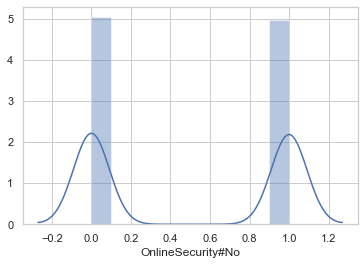

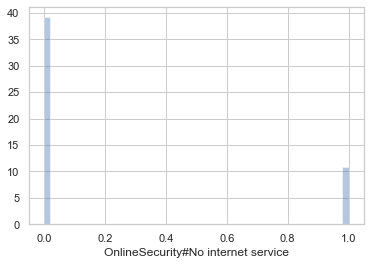

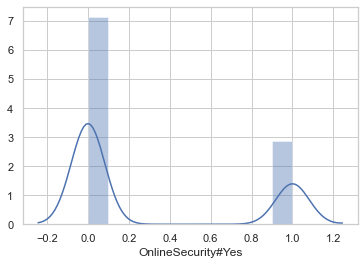

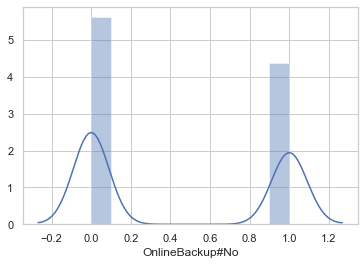

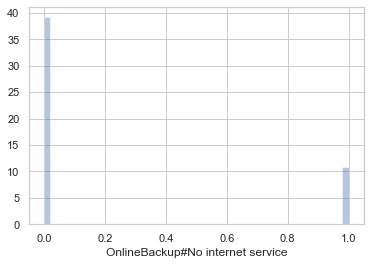

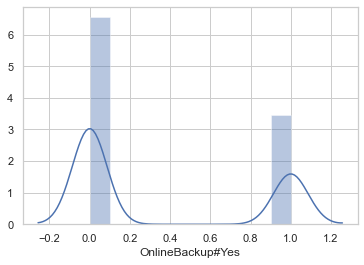

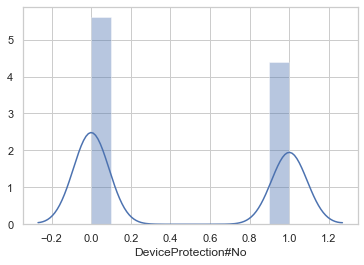

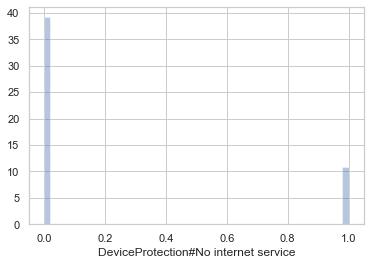

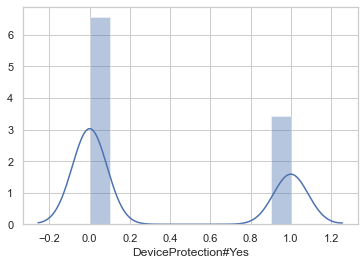

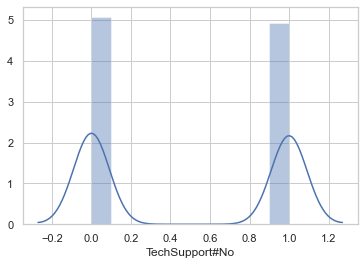

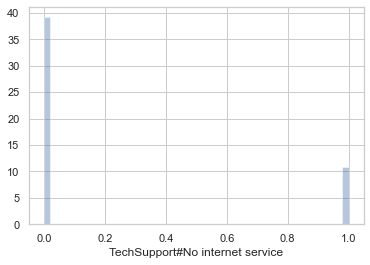

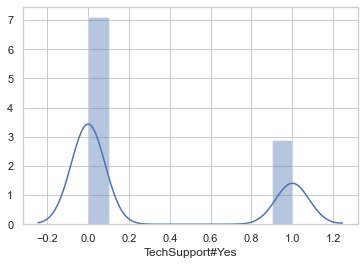

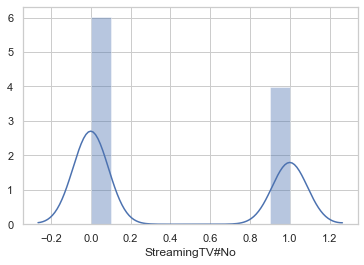

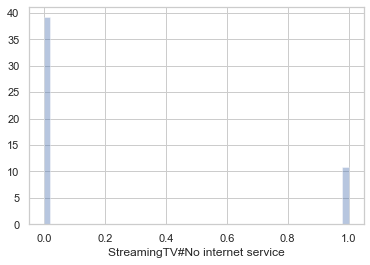

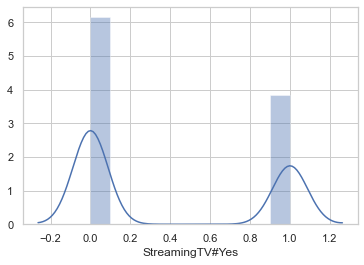

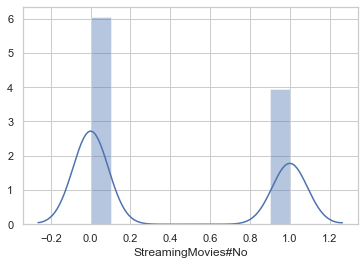

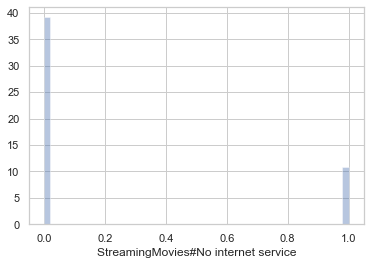

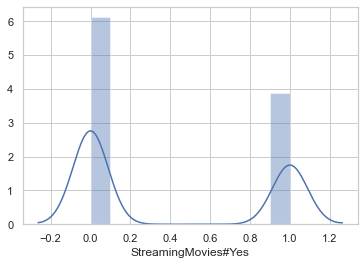

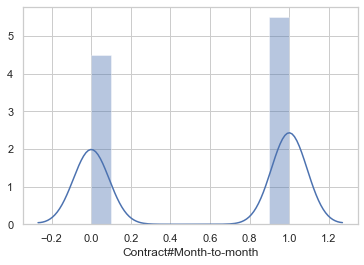

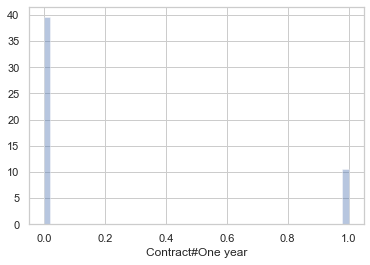

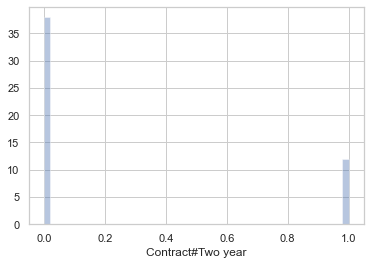

In [203]:
for i in x.columns:
    plt.figure()
    sb.distplot(x[i])

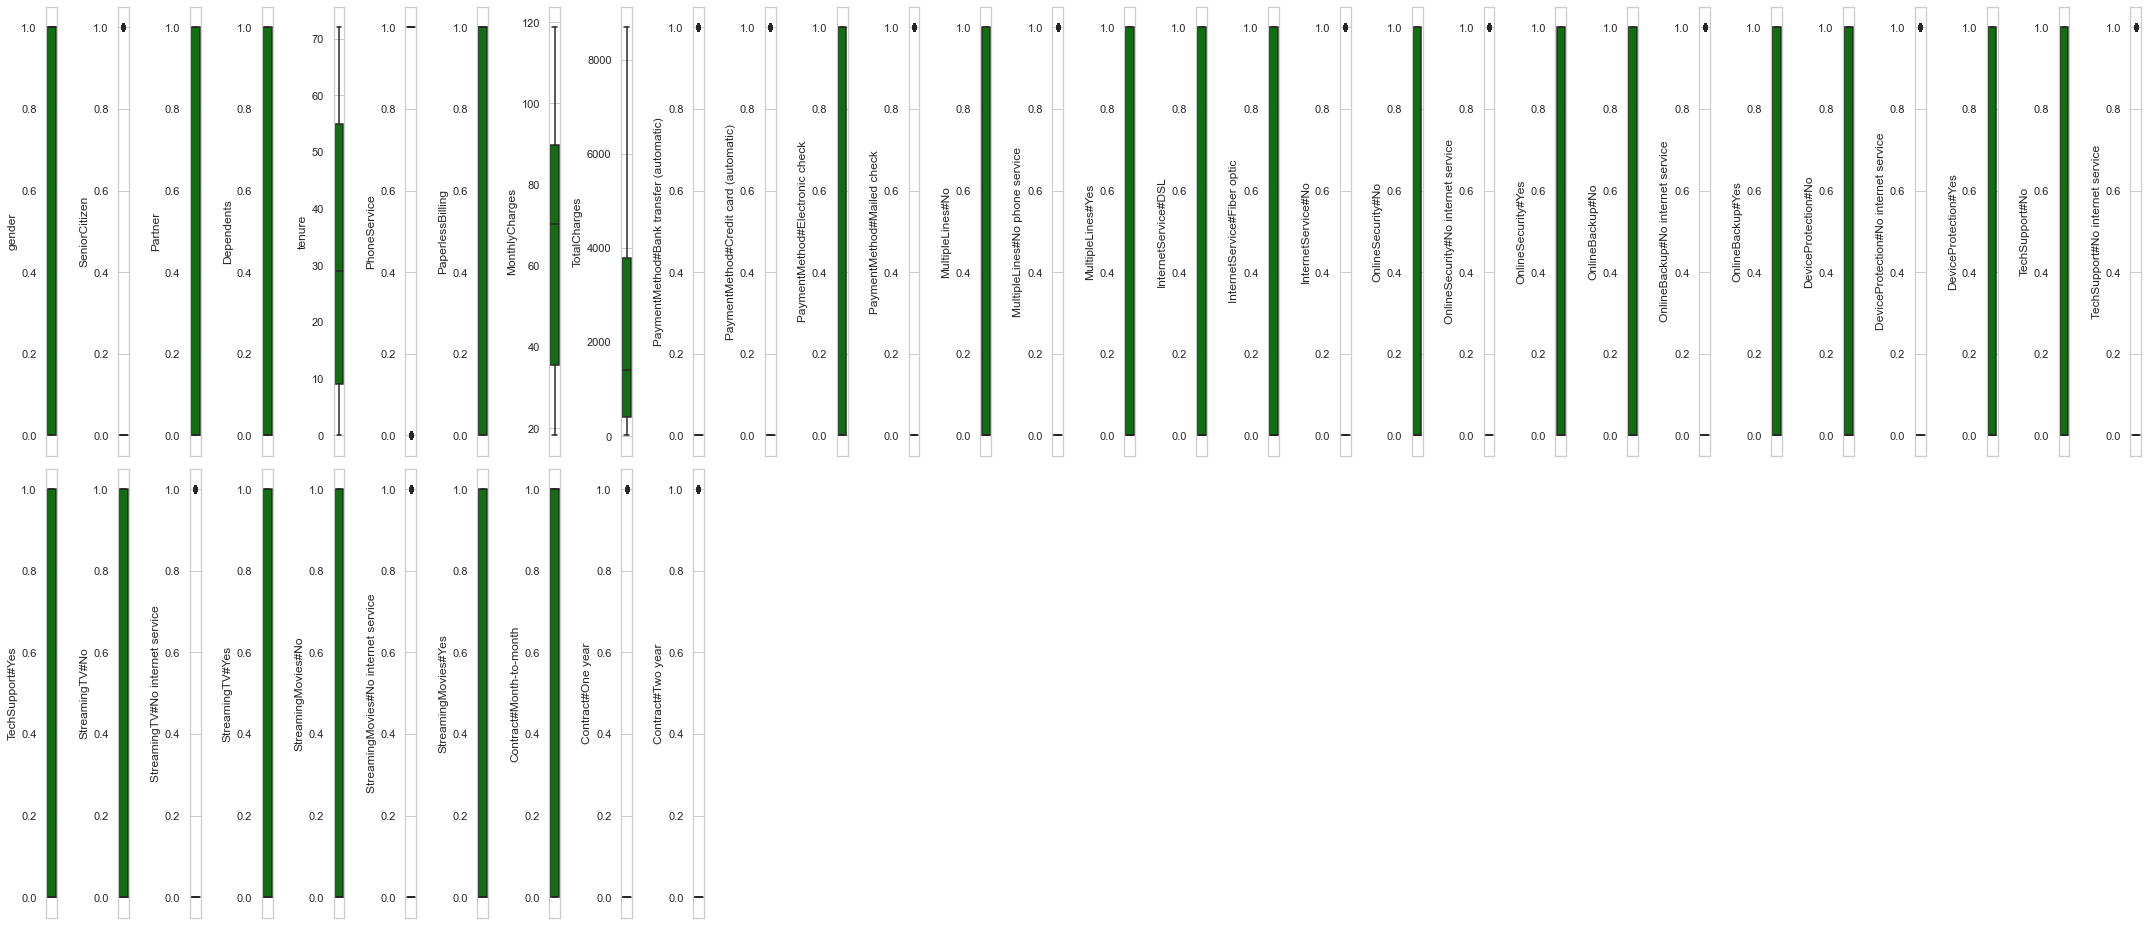

In [204]:
collist = x.columns
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(x[collist[i]],color = 'green',orient='v')
    plt.tight_layout()

In [205]:
x.skew()

gender                                    -0.019031
SeniorCitizen                              1.833633
Partner                                    0.067922
Dependents                                 0.875199
tenure                                     0.239540
PhoneService                              -2.727153
PaperlessBilling                          -0.375396
MonthlyCharges                            -0.220524
TotalCharges                               0.962394
PaymentMethod#Bank transfer (automatic)    1.357605
PaymentMethod#Credit card (automatic)      1.379837
PaymentMethod#Electronic check             0.695541
PaymentMethod#Mailed check                 1.290981
MultipleLines#No                           0.074752
MultipleLines#No phone service             2.727153
MultipleLines#Yes                          0.316610
InternetService#DSL                        0.658113
InternetService#Fiber optic                0.243494
InternetService#No                         1.375769
OnlineSecuri

In [206]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod#Bank transfer (automatic),...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,1,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,0,...,0,1,0,0,1,0,0,1,0,0


In [207]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [209]:
maxAccu=0
maxRS=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    accu=accuracy_score(y_test,predlr)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)

Best Accu is: 0.8316129032258065 on RS: 940


In [210]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=940)

Logistic Regression

In [211]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8316129032258065
[[1051  108]
 [ 153  238]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1159
           1       0.69      0.61      0.65       391

    accuracy                           0.83      1550
   macro avg       0.78      0.76      0.77      1550
weighted avg       0.83      0.83      0.83      1550



In [214]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.80056778 0.80979418 0.78921221 0.8125     0.80539773]
0.8034943786695916


Gaussian NB

In [212]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.6967741935483871
[[737 422]
 [ 48 343]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1159
           1       0.45      0.88      0.59       391

    accuracy                           0.70      1550
   macro avg       0.69      0.76      0.68      1550
weighted avg       0.82      0.70      0.72      1550



In [213]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.70617459 0.69623847 0.682044   0.68323864 0.69318182]
0.6921755032582747


Support Vector Classifire

In [215]:
sv=SVC()
sv.fit(x_train,y_train)
predv=sv.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predv))
print(confusion_matrix(y_test,predv))
print(classification_report(y_test,predv))

accuracy_score:
0.747741935483871
[[1159    0]
 [ 391    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1159
           1       0.00      0.00      0.00       391

    accuracy                           0.75      1550
   macro avg       0.37      0.50      0.43      1550
weighted avg       0.56      0.75      0.64      1550



Random Forest

In [216]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy_score:
0.8180645161290323
[[1058  101]
 [ 181  210]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1159
           1       0.68      0.54      0.60       391

    accuracy                           0.82      1550
   macro avg       0.76      0.72      0.74      1550
weighted avg       0.81      0.82      0.81      1550



AD BOOST

In [217]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
0.824516129032258
[[1053  106]
 [ 166  225]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1159
           1       0.68      0.58      0.62       391

    accuracy                           0.82      1550
   macro avg       0.77      0.74      0.75      1550
weighted avg       0.82      0.82      0.82      1550



Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
dt_gini=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
preddt=dt_gini.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy_score:
0.7535483870967742
[[965 194]
 [188 203]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1159
           1       0.51      0.52      0.52       391

    accuracy                           0.75      1550
   macro avg       0.67      0.68      0.68      1550
weighted avg       0.75      0.75      0.75      1550



Cross Validation

In [220]:
model=[rf,gnb,sv,ad,lg,dt_gini]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy_score:
0.8135483870967742
[[1057  102]
 [ 187  204]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1159
           1       0.67      0.52      0.59       391

    accuracy                           0.81      1550
   macro avg       0.76      0.72      0.73      1550
weighted avg       0.80      0.81      0.81      1550

[0.80411639 0.79134138 0.76011356 0.78480114 0.79332386]
0.7867392654364798
accuracy_score:
0.6967741935483871
[[737 422]
 [ 48 343]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1159
           1       0.45      0.88      0.59       391

    accuracy                           0.70      1550
   macro avg       0.69      0.76      0.68      1550
weighted avg       0.82      0.70      0.72      1550

[0.70617459 0.69623847 0.682044   0.68323864 0.69318182]
0.6921755032582747
accuracy_score:
0.747741935483871
[[1159    0]
 [ 391    0]]
             

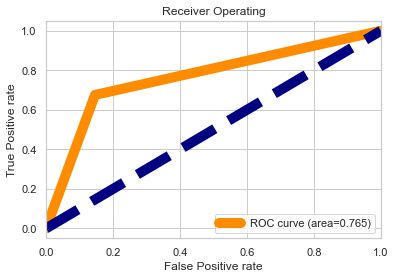

In [221]:
from sklearn.metrics import roc_curve,auc
fpr,trp,thresholds =  roc_curve(predr,y_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()

In [222]:
import pickle
filename = 'Churn.pkl'
pickle.dump(rf,open(filename,'wb'))

In [223]:
loaded_model = pickle.load(open('Churn.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8135483870967742
